# COGS 108 - Final Project
Factors that will potentially affect a YouTube video's long-term popularity

# Names

- Jared (Ruotian) Chen
- Jimin Cheon
- Kane Gu
- Laurence D'Ercole
- Nisha Davankar

# Setup

## (Optional) Live Slideshow

In [1]:
%%capture
import sys

!{sys.executable} -m pip install --quiet --user --upgrade RISE
!jupyter nbextension install rise --user --python
!jupyter nbextension enable rise --user --python

In [2]:
from notebook.services.config import ConfigManager
_ = ConfigManager().update('livereveal', {
        'scroll': True
})

## Styling

In [3]:
%%html
<style>
    @import url('https://fonts.googleapis.com/css2?family=Lexend+Deca');

    .reveal {
        padding: 2em;
        font-family: georgia, 'times new roman', times, serif;
    }
    
    .reveal :is(h1, h2, h3, h4, h5, h6) {
        width: 60%;
        font-family: 'Lexend Deca', serif;
    }
    
    .reveal a {
        text-decoration: none !important;
    }
    
    .reveal p {
        width: 90%;
    }
    
    .reveal p.funky::first-letter {
        float: left;
        font-size: 6em;
        line-height: 0.8em;
        padding-top: 4px;
        padding-right: 8px;
        padding-left: 3px;        
    }
</style>

# Overview

- In this project we explore what kinds of video attributes affect the popularity of a YouTube video, by comparing 5 different attributes (ads, video quality, video category, tags, and duration) with two population parameters, based on average views only ("convenient popularity") and a ratio of average views/likes/dislikes/comments ("overall popularity"). 
- We found that 4 of the tested attributes, ads, video quality, category, and duration likely affect the video popularity, while video tags does not seem to be a significant attribute. 
- Videos with ads at the beginning, HD quality, categories of "Gaming" or "Travel and Events", and a 5-30 min. duration tend to be more popular videos.      



<a id='research_question'></a>
# Research Question

What types of YouTube videos tend to get more popular in United States?

## Background & Prior Work

In our initial discussions, when thinking about the power of data in our daily lives, one of the first aspects we thought of was social media. Social media is a very influential medium because of how many people use it, as well as how it has become integrated into our social and cultural structures. Social media often gives users the opportunity to create profiles which become representations of the users within the Internet; it also becomes more and more representative of the user as the multiple types of data (from user interaction with the social media platform) are collected and attributed to these profiles. With this much data, we became curious about the algorithms and models created using this data, in particular the videosharing platform YouTube’s various video algorithms.      

## Sources

### [NBC News - As algorithms take over, YouTube's recommendations highlight a human problem](https://www.nbcnews.com/tech/social-media/algorithms-take-over-youtube-s-recommendations-highlight-human-problem-n867596)

<p class='funky'>YouTube utilizes a recommendation section which gives users recommendations based on the user’s search, views, likes, etc. While this creates a unique and tailor-made experience for every user on YouTube, some people like David Carroll associate professor of media design at The New School argue that the algorithm simply optimizes ad watch time and circulates harmful/"frictionless" videos. This article cites different experiments that show that many of the YouTube popular videos recommended are often conspiracy videos, false information, or even propaganda. The YouTube algorithm is said to drive 70% of user watches according to this article, which made it clear to us that this is a very influential algorithm. We felt that this kind of powerful data and application of data is something that could become dangerous if unmonitored, and we became curious as to how exactly a big business chooses videos to be recommended. This algorithm is also constantly updated and complicated, so while we may not know exactly every step that YouTube takes, we can get an idea by observing trends and popularity of YouTube videos. Because we know that ads are a big driving force, we are particularly curious to see if the presence of ads has any effect on the video’s popularity.</p>

### [The New York Times - YouTube, the Great Radicalizer](https://www.nytimes.com/2018/03/10/opinion/sunday/youtube-politics-radical.html)

<p class='funky'>Guillaume Chaslot is a former Google employee specializing in AI, who brought attention to the “extremism” tendency of the algorithm and was fired from Google. Chaslot’s program created to observe the recommendation patterns showed that there was a tendency by YouTube to perpetuate extremist or “inflammatory” content, citing that “whether you started with a proClinton or pro-Trump video on YouTube, you were many times more likely to end up with a pro-Trump video recommended”. Because YouTube is a democratized platform resulting in various types of videos, we became curious in exploring what kinds of content genre is YouTube seemingly biased towards? What factors drive these biases? We also became curious about the uniqueness of the recommended videos, since recommendations are based on the user’s viewing habits this means that every user’s recommendation section should be unique. However, based on the article’s inflammatory content example, we would like to know if there are videos that YouTube recommends to everyone, or the extent to which YouTube personalizes each recommended section.</p>

# Hypothesis


There are many popularity metrics applicable for social media content. For simplicity, however, we will only be focusing on a video's **convenient** and **overall** popularity, as they are the two most common popularity metrics on YouTube.

We define long-term **convenient** popularity as follows:
- number of views: `stats.view`

We define long-term **overall** popularity as follows:
- like/dislike ratio: `stats.like	stats.dislike`
- number of comments: `stats.comment`
- number of views: `stats.view`

We believe that YouTube recommendations would influence greatly what videos are popular. We believe that YouTube would generally want to recommend videos that reach large amounts of groups to maximize ad profit (so we hypothesized presence of ads), we discussed what kinds of videos we thought the general public watches the most. Because of the popularity of short form video media currently popular (like TikTok), we believe that shorter length videos would be most popular so we believe duration of videos is pertinent. Finally, we considered multiple other video attributes (listed below) before narrowing them down to attributes with data we had access to, as well as feasibility.   



**We hypothesize that ads, video quality, video category, tags, and video duration are the 5 main attributes that affect a YouTube video's popularity in the United States.** 

For reference, below is a list of factors included in our hypothesis.

Factors that potentially **affect** a video's popularity:
- time created: `time`
- duration: `length`
- number of tags: `tags`
- video category: `category`
- video quality: `video.quality`
- ad placement: `has_ad	has_ad_at_beginning`


# Dataset(s)

- Dataset Name: YouTube Video Database
- Link to the dataset: `EDA/dsamples/youtube_search_random_extended_ascii.dataset`
- Number of observations: approx. 2000 (expected 5000)

# Setup

In [4]:
import sys

!{sys.executable} -m pip install --quiet --user --upgrade -r EDA/requirements.txt
!{sys.executable} -m pip install --quiet --user --upgrade pandas==1.* numpy matplotlib seaborn patsy statsmodels

In [5]:
from EDA.goodies import *

In [6]:
from EDA.dcollect import restful
from EDA.dcollect import api_youtube as youtube
from EDA.dcollect import api_youtubei as youtubei

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

%matplotlib inline
import IPython
IPython.display.set_matplotlib_formats('svg')

In [8]:
from EDA import utils

dataset_search = utils.EDA.dataset('EDA/dsamples/youtube_search_random_extended_ascii.dataset')
df_search_details = dataset_search.load('youtube_search_details.pkl')
df_search_channels = dataset_search.load('youtube_search_channels.pkl')

dataset_trending = utils.EDA.dataset('EDA/dsamples/youtube_trending.dataset')
df_trending_details = dataset_trending.load('youtube_trending_details.pkl')
df_trending_channels = dataset_trending.load('youtube_trending_channels.pkl')

# Data Cleaning

We started our data processing by accessing the YouTube API, where we generated a list of random videos and their video stats. In order to avoid potential bias in the data we choose to analyze (i.e. we get videos from different YouTube categories), we decided to conduct our investigation on a random set of videos. From the available stats (see dataset for full list of video stats offered from API), we create a dataframe called `df_search_details` where we store the video stats. 

We hypothesized that the presence of ads (specifically ads that appear at the beginning of videos) would be a contributing factor to video popularity, so we added a column into our data frame to display if the video contains ads at the beginning of the video. We display the information as well as some basic descriptive stats summarizing the video information. 

Note that, even though we have all the data on ad placements, we still can't determine exactly when and where the ad will appear in a video, much thanks to YouTube's unqiue approach to monetization. While collecting data we found that, quite suprisingly, the ad placements for most of the videos change from time to time - the only two types of ads that doesn't change, however, are the ads at the beginning (`youtubei.resource.ad.kinds.START`) and the ads at the end (`youtubei.resource.ad.kinds.END`). Through further investigation we found that this is due to the presence of [ad breaks](https://support.google.com/youtube/answer/6175006) in some of the videos in our dataset, where content creators have the option to enable randomization of ad placements.

Therefore in the code below we specifically asked for the presence of ads at the beginning, as opposed to the number of ads or the timestamp of ads or anything that's subject to change upon the next update of our dataset.

The `category` and `video.quality` columns aren't fully working yet. We initially envisioned them to contain categorical types to reduce the memory footprint during data analysis. But for now we will convert them to `str`s instead.

In [9]:
# - ads (filter)
def clean_ads_col(df):
    def filter_has_ad(ads):
        return type(ads) == list
    def filter_has_ad_beginning(ads):
        if type(ads) == type(None) or type(ads) != list:
            return False
            
        for ad in ads:
            if ad['kind'] == youtubei.resource.ad.kinds.START:
                return True
        return False

    df['has_ad'] = df['ads'].apply(filter_has_ad)
    df['has_ad_at_beginning'] = \
            df['ads'].apply(filter_has_ad_beginning)
    df.drop('ads', axis = 'columns', inplace = True)

    
clean_ads_col(df_search_details)
clean_ads_col(df_trending_details)

df_search_details = df_drop_duplicates(df_search_details, level = 'id')
df_trending_details = df_drop_duplicates(df_trending_details, level = 'id')

df_search_details['category'] = df_search_details['category'].astype(str)
df_trending_details['category'] = df_trending_details['category'].astype(str)
df_search_details['video.quality'] = df_search_details['video.quality'].astype(str)
df_trending_details['video.quality'] = df_trending_details['video.quality'].astype(str)

df_report(df_search_details, name = 'Search Results')

---

# Results - Search Results

## Data Preview

,title,description,time,length,tags,category,creator.id,stats.like,stats.dislike,stats.comment,stats.view,video.quality,has_ad,has_ad_at_beginning
id,,,,,,,,,,,,,,
-1K_yQO8P_0,J / Feel Your Blaze,J LIVE and LET RIDE\n@SHIBUYA O-EAST 20081231\...,2017-02-09 15:12:20+00:00,0 days 00:05:46,"[LUNA SEA, J LUNA SEA, Jun Onose, wumf, j feel...",Music,UCSJUUn_KQw1T3gff5mRjblg,291.0,3.0,24.0,48009.0,HD,True,True
-49fGh_Hbhw,My Pet Fish are DYING In My Backyard Pond! Res...,🔹Buy 𝙂𝙊𝙊𝙂𝘼𝙉 𝘽𝘼𝙄𝙏𝙎 -- https://googansquad.com/...,2021-03-09 00:19:41+00:00,0 days 00:24:57,"[fishing, survial, camping, outdoors, cooking,...",Howto & Style,UCI6gB6eZS0c3ZrjcJq7xAtA,5187.0,93.0,648.0,132494.0,HD,True,True
-4z3GvwXCtM,YUMMY FOOD HACKS || Ultimate Snack Hacks You’l...,Whether you’re eating a snack after school or ...,2020-09-11 16:51:36+00:00,0 days 00:10:21,"[DIY, hacks, tricks, craft, crafts, prank, pra...",People & Blogs,UCu_ytbeyzLZfIKWr43QSb5A,76075.0,10207.0,2687.0,10212445.0,HD,True,True
-6-FNvMf56A,Cardi B Meets Cardi E,"For Halloween, Ellen transformed into “Cardi E...",2019-10-31 13:00:00+00:00,0 days 00:06:03,"[plm, ellen, ellen degeneres, the ellen degene...",Entertainment,UCp0hYYBW6IMayGgR-WeoCvQ,465187.0,19911.0,14175.0,23949467.0,HD,True,True
-6aXn_zyyiY,26 IDÉES SPLENDIDES À FAIRE QUAND ON S'ENNUIE,ACTIVITÉS GÉNIALES QUE TU DEVRAIS ESSAYER POUR...,2020-05-06 16:00:00+00:00,0 days 00:13:30,"[fait-maison, art, savoir-faire, astuces, habi...",Howto & Style,UC9TJezP2M1ADmUYVl8hrQ2A,2800.0,248.0,199.0,202986.0,HD,True,True


## Stats

,length,stats.like,stats.dislike,stats.comment,stats.view
count,2209,2.176000e+03,2.176000e+03,2.043000e+03,2.208000e+03
mean,0 days 00:16:01.243549117,3.028353e+05,3.100054e+04,1.812509e+04,4.590095e+07
std,0 days 00:44:13.204714620,1.173375e+06,1.727713e+05,1.322898e+05,2.369428e+08
min,0 days 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0 days 00:03:33,3.610750e+03,8.975000e+01,1.275000e+02,1.054330e+05
50%,0 days 00:07:05,2.271350e+04,8.220000e+02,1.042000e+03,1.176212e+06
75%,0 days 00:14:38,1.217852e+05,6.850000e+03,5.180500e+03,1.150240e+07
max,0 days 15:13:24,2.111358e+07,4.142776e+06,5.198500e+06,4.418250e+09


---

## Popularity Scores

In [10]:
def normalize(a):
    return a / (a.max() - a.min())

def nan_conv(x):
    return np.nan_to_num(x)

def get_popularity_score_ratio(
    df,
    col_like, col_dislike, 
    col_comment, col_view
):
    def scores_filter(x):
        if (x > 1) or not np.isfinite(x):
            return np.nan
        return x

    scores = (nan_conv(df[col_like]) - nan_conv(df[col_dislike]) + nan_conv(df[col_comment])) / df[col_view]
    scores = scores.apply(scores_filter)
    return normalize(scores)

def get_popularity_score_avg(
    df,
    col_like, col_dislike, 
    col_comment, col_view
):
    scores = df[[col_like, col_comment, col_view]] \
                .mean(axis = 'columns', skipna = True)
    return normalize(scores)  

def get_popularity_score_ratings(
    df,
    col_like, col_dislike, 
    col_comment, col_view
):
    scores = df[col_like] - df[col_dislike]
    return normalize(scores)

def get_popularity_score_view_count(
    df,
    col_like, col_dislike, 
    col_comment, col_view
):
    scores = df[col_view]
    return normalize(scores)

In [11]:
df_search_details_da = \
    df_search_details.copy(deep = False)

df_search_details_da['da.score.popularity'] = \
    get_popularity_score_ratio(
        df = df_search_details_da,
        col_like = 'stats.like', col_dislike = 'stats.dislike', 
        col_comment = 'stats.comment', col_view = 'stats.view'
    )

df_search_details_da['da.score.ratings'] = \
    get_popularity_score_ratings(
        df = df_search_details_da,
        col_like = 'stats.like', col_dislike = 'stats.dislike', 
        col_comment = 'stats.comment', col_view = 'stats.view'
    )

df_search_details_da['da.score.views'] = \
    get_popularity_score_view_count(
        df = df_search_details_da,
        col_like = 'stats.like', col_dislike = 'stats.dislike', 
        col_comment = 'stats.comment', col_view = 'stats.view'
    )

df_report(df_search_details_da)

---

# Results - 

## Data Preview

,title,description,time,length,tags,category,creator.id,stats.like,stats.dislike,stats.comment,stats.view,video.quality,has_ad,has_ad_at_beginning,da.score.popularity,da.score.ratings,da.score.views
id,,,,,,,,,,,,,,,,,
-1K_yQO8P_0,J / Feel Your Blaze,J LIVE and LET RIDE\n@SHIBUYA O-EAST 20081231\...,2017-02-09 15:12:20+00:00,0 days 00:05:46,"[LUNA SEA, J LUNA SEA, Jun Onose, wumf, j feel...",Music,UCSJUUn_KQw1T3gff5mRjblg,291.0,3.0,24.0,48009.0,HD,True,True,0.017772,0.000016,0.000011
-49fGh_Hbhw,My Pet Fish are DYING In My Backyard Pond! Res...,🔹Buy 𝙂𝙊𝙊𝙂𝘼𝙉 𝘽𝘼𝙄𝙏𝙎 -- https://googansquad.com/...,2021-03-09 00:19:41+00:00,0 days 00:24:57,"[fishing, survial, camping, outdoors, cooking,...",Howto & Style,UCI6gB6eZS0c3ZrjcJq7xAtA,5187.0,93.0,648.0,132494.0,HD,True,True,0.118515,0.000276,0.000030
-4z3GvwXCtM,YUMMY FOOD HACKS || Ultimate Snack Hacks You’l...,Whether you’re eating a snack after school or ...,2020-09-11 16:51:36+00:00,0 days 00:10:21,"[DIY, hacks, tricks, craft, crafts, prank, pra...",People & Blogs,UCu_ytbeyzLZfIKWr43QSb5A,76075.0,10207.0,2687.0,10212445.0,HD,True,True,0.018358,0.003570,0.002311
-6-FNvMf56A,Cardi B Meets Cardi E,"For Halloween, Ellen transformed into “Cardi E...",2019-10-31 13:00:00+00:00,0 days 00:06:03,"[plm, ellen, ellen degeneres, the ellen degene...",Entertainment,UCp0hYYBW6IMayGgR-WeoCvQ,465187.0,19911.0,14175.0,23949467.0,HD,True,True,0.052462,0.024137,0.005421
-6aXn_zyyiY,26 IDÉES SPLENDIDES À FAIRE QUAND ON S'ENNUIE,ACTIVITÉS GÉNIALES QUE TU DEVRAIS ESSAYER POUR...,2020-05-06 16:00:00+00:00,0 days 00:13:30,"[fait-maison, art, savoir-faire, astuces, habi...",Howto & Style,UC9TJezP2M1ADmUYVl8hrQ2A,2800.0,248.0,199.0,202986.0,HD,True,True,0.037062,0.000138,0.000046


## Stats

,length,stats.like,stats.dislike,stats.comment,stats.view,da.score.popularity,da.score.ratings,da.score.views
count,2209,2.176000e+03,2.176000e+03,2.043000e+03,2.208000e+03,2200.000000,2176.000000,2208.000000
mean,0 days 00:16:01.243549117,3.028353e+05,3.100054e+04,1.812509e+04,4.590095e+07,0.102184,0.014735,0.010389
std,0 days 00:44:13.204714620,1.173375e+06,1.727713e+05,1.322898e+05,2.369428e+08,0.131071,0.058121,0.053628
min,0 days 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.086143,-0.002487,0.000000
25%,0 days 00:03:33,3.610750e+03,8.975000e+01,1.275000e+02,1.054330e+05,0.017486,0.000167,0.000024
50%,0 days 00:07:05,2.271350e+04,8.220000e+02,1.042000e+03,1.176212e+06,0.047773,0.001076,0.000266
75%,0 days 00:14:38,1.217852e+05,6.850000e+03,5.180500e+03,1.150240e+07,0.140930,0.005821,0.002603
max,0 days 15:13:24,2.111358e+07,4.142776e+06,5.198500e+06,4.418250e+09,0.913857,0.997513,1.000000


---

## Distribution of Scores

To get a general sense of our data and the popularity scores before modifying our data, we initialize 3 distplots displaying the overall popularity, average ratings (defined as averaged likes - dislikes), and convenient popularity compared to all of our videos from the datasets. All three plots show a slight right skew, and are unimodal. Overall popularity scores shows the most videos scoring between 0.0-0.13, while ratings and convenient popularity similarily have the most videos scoring closer to 0.0.  

### Overall Popularity

<Figure size 432x288 with 0 Axes>

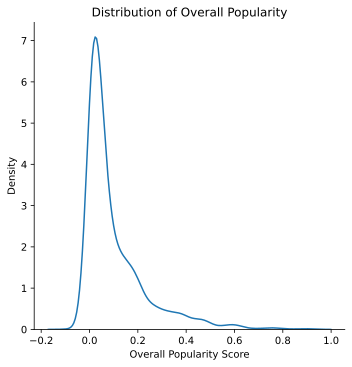

In [12]:
# Plot overall popularity distribution
# Overall popularity is calcuated by (likes - dislikes) / views 
_ = plt.figure()
_ = sns.displot(
    data = df_search_details_da, 
    x = 'da.score.popularity',
    kind = 'kde'
).set(
    title = 'Distribution of Overall Popularity',
    xlabel = 'Overall Popularity Score'
)

### Ratings

<Figure size 432x288 with 0 Axes>

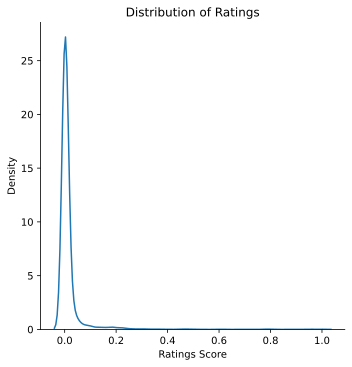

In [13]:
# Plot the distribution of ratings
# Ratings is likes - dislikes
_ = plt.figure()
_ = sns.displot(
    data = df_search_details_da, 
    x = 'da.score.ratings', 
    kind = 'kde'
).set(
    title = 'Distribution of Ratings',
    xlabel = 'Ratings Score'
)

### Convenient Popularity (View Count)

<Figure size 432x288 with 0 Axes>

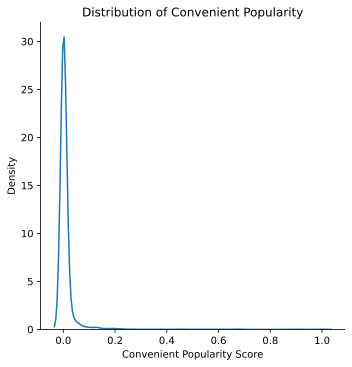

In [14]:
# Plot distribution of convenient popularity score 
# Convenient Popularity Score is based on only views
_ = plt.figure()
_ = sns.displot(
    data = df_search_details_da, 
    x = 'da.score.views', 
    kind = 'kde'
).set(
    title = 'Distribution of Convenient Popularity',
    xlabel = 'Convenient Popularity Score'
)

## Ad Placements

cha cha real smooth imma add an Ad here

- The plots below compare the videos that have/don't have an ad anywhere in the video, and videos that have/don't have an ad at the beginning. 
- The first plot compares `has_ad` to the average rating (measured by normalizing likes minus dislikes). 
- The second plot compares `has_ad` to average popularity (measured by dividing likes - dislikes + comments by views).  
-  The third plot compares `has_ad_at_beginning` to the average rating. 
- The fourth plot compares `has_ad_at_beginning` to average popularity. 
- We can see that in all four cases, the ratings and popularity of a video tends to be higher when there is an ad attached to the video, and when the ad is at the beginning.

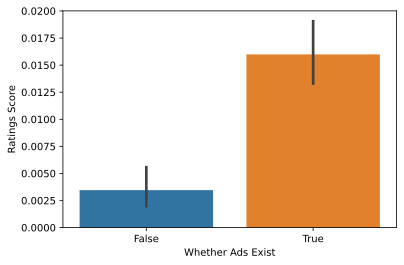

In [15]:
# Graph of whether a video has ads or not and compare it to score of ratings
# Ratings is calculated by likes - dislikes
_ = plt.figure()
plot_has_ad_ratings = sns.barplot(
    data = df_search_details_da, 
    x = 'has_ad', y = 'da.score.ratings'
)
_ = plot_has_ad_ratings.set(
    xlabel = 'Whether Ads Exist',
    ylabel = 'Ratings Score'
)

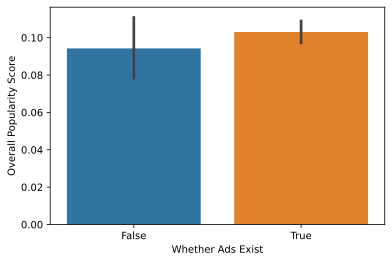

In [16]:
# Graph whether a video has ads and compare it with overall popularity score
_ = plt.figure()
plot_has_ad_popularity = sns.barplot(
    data = df_search_details_da, 
    x = 'has_ad', y = 'da.score.popularity'
)
_ = plot_has_ad_popularity.set(
    xlabel = 'Whether Ads Exist',
    ylabel = 'Overall Popularity Score'
)

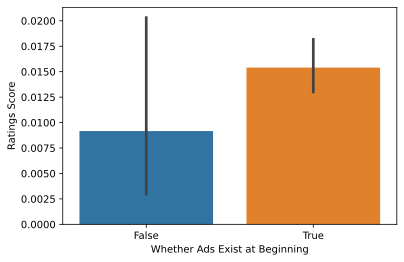

In [17]:
# Graph checks whether ads exist in beginning and compares it to score of ratings
_ = plt.figure()
plot_has_ad_beginning_ratings = sns.barplot(
    data = df_search_details_da, 
    x = 'has_ad_at_beginning', y = 'da.score.ratings'
)
_ = plot_has_ad_beginning_ratings.set(
    xlabel = 'Whether Ads Exist at Beginning',
    ylabel = 'Ratings Score'
)

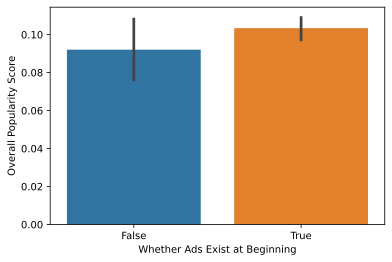

In [18]:
# Graph whether whether video has ads at beginning and compare it to overall popularity score
_ = plt.figure()
plot_has_ad_beginning_popularity = sns.barplot(
    data = df_search_details_da, 
    x = 'has_ad_at_beginning', y = 'da.score.popularity'
)
_ = plot_has_ad_beginning_popularity.set(
    xlabel = 'Whether Ads Exist at Beginning',
    ylabel = 'Overall Popularity Score'
)

## Video Quality

Roses are red \
Violets are blue \
The world is in HD \
So why can't you

- This chart compares the overall popularity of the videos with HD quality to the videos with SD quality. 
- It is not surprising that we see the videos with HD quality have higher popularity than the videos with SD quality. It is possible that youtubers with a higher budget due to having an established account are able to afford releasing videos with higher quality. 
- Thus, these videos are more popular than videos with a lower quality.

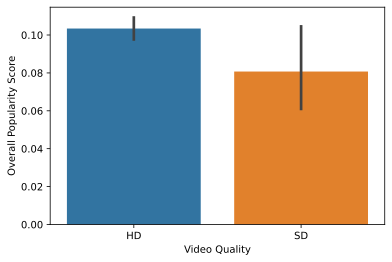

In [19]:
# Graph video quality and compare it to overall score popularity 
_ = plt.figure()
plot_quality_popularity = sns.barplot(
    data = df_search_details_da, 
    x = 'video.quality', y = 'da.score.popularity'
)
_ = plot_quality_popularity.set(
    xlabel = 'Video Quality',
    ylabel = 'Overall Popularity Score'
)

## Category

[Never gonna give you up](https://youtu.be/dQw4w9WgXcQ) \
Never gonna let you down \
[Never gonna run around and desert you](https://youtu.be/dQw4w9WgXcQ) \
Never gonna make you cry \
Never gonna [say goodbye](https://youtu.be/dQw4w9WgXcQ) \
Never gonna [tell a lie and hurt you](https://youtu.be/dQw4w9WgXcQ)

### Convenient Popularity
- We see in the graph below that popularity changes based on the category of the video. 
- The highest popularity occurs in videos in the categories of Music, Education and Film and Animation. 
- These results are not surprising as the uploaders for these categories tend to be popular youtubers. Music may be uploaded by famous artists in top charts.
- Films and Animation also has many viewers so they quickly gain popularity, especially if the films contain famous actors and directors. 
- The Educational category is slightly surprising at first, but it does make sense as youtube can serve as a platform to gain education for free.


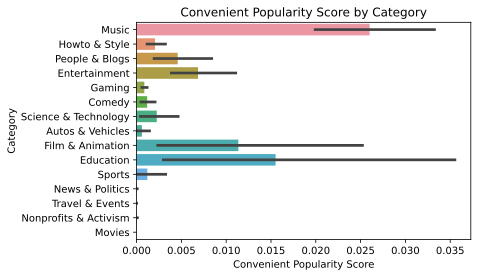

In [20]:
# Plot convenient populariy by category 
_ = plt.figure()
plot_category_views = sns.barplot(
    data = df_search_details_da, 
    y = 'category', x = 'da.score.views', orient = 'h'
)
_ = plot_category_views.set(
    title = 'Convenient Popularity Score by Category',
    xlabel = 'Convenient Popularity Score',
    ylabel = 'Category'
)

### Overall Popularity
- In this graph we measure popularity by ((like - dislike + comment) / views). Therefore, we see a better distributed graph. 
- In convenient popularity, the data was biased toward music because that category in general receives a lot of views. In fact, there was such a big disparity in views that some categories weren't shown in the graph. With proportions, we see that travel & events show the highest popularity score. This category received the highest amount of likes - dislikes and comments relative to its views. 
- We can see that music actually scores a lot lower in this metric, which infers that it receives many viewers but not as relatively many likes and comments. 

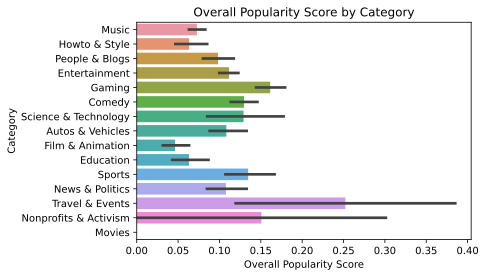

In [21]:
# Plot overall populariy by category 
_ = plt.figure()
plot_category_popularity = sns.barplot(
    data = df_search_details_da, 
    y = 'category', x = 'da.score.popularity', orient = 'h'
)
_ = plot_category_popularity.set(
    title = 'Overall Popularity Score by Category',
    xlabel = 'Overall Popularity Score',
    ylabel = 'Category'
)

## Number of Tags

`#number` `#of` `#tags`

### Convenient Popularity 
- In this graph, videos that have 30 to 60 tags seem to be most popular. In otherwords, videos with that number of tags receive the most amount of views. The overall trend suggests that popularity increases up to 60 tags. Afterwords, there is a sharp drop. It is possible that youtubers who add more than 60 tags are ones who are new and trying to find more ways to pop up in searches. 

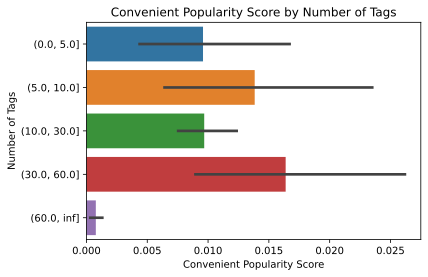

In [22]:
# Plot convenient popularity in regards to number of tags
_ = plt.figure()
plot_tags_popularity = sns.barplot(
    y = pd.cut(
        x = df_search_details_da['tags'].str.len(),
        bins = [np.PZERO, 5, 10, 30, 60, np.PINF]
    ), 
    x = df_search_details_da['da.score.views'], 
    orient = 'h'
)
_ = plot_tags_popularity.set(
    title = 'Convenient Popularity Score by Number of Tags',
    xlabel = 'Convenient Popularity Score',
    ylabel = 'Number of Tags'
)

### Overall Popularity
- In the graph below, we observe that the popularity score remains roughly the same despite the varying number of tags. This shows that tags might not be a significant attribute to popularity. Even the bin of videos from 0 to 5 tags show a high popularity score. 
- This graph is a sharp contrast to the one above suggesting that videos with high views receive relatively low ratings and comments. 

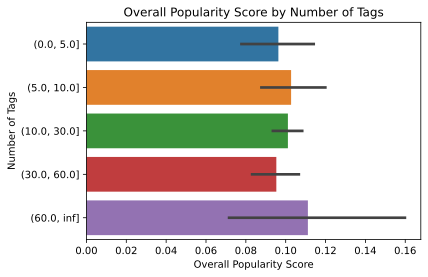

In [23]:
# Plot overall popularity in regards to number of tags
_ = plt.figure()
plot_tags_popularity = sns.barplot(
    y = pd.cut(
        x = df_search_details_da['tags'].str.len(),
        bins = [np.PZERO, 5, 10, 30, 60, np.PINF]
    ), 
    x = df_search_details_da['da.score.popularity'], 
    orient = 'h'
)
_ = plot_tags_popularity.set(
    title = 'Overall Popularity Score by Number of Tags',
    xlabel = 'Overall Popularity Score',
    ylabel = 'Number of Tags'
)

## Duration

Roses are red \
Violets are blue \
Why not make a comment \
While you are at it

### Convenient Popularity
- When we only look at the views, we see that three to five minute videos have the highest popularity score. The distribution is largely unimodal with a skew to the right. The graph suggests that shorter videos does seem to be preferred over longer videos. 

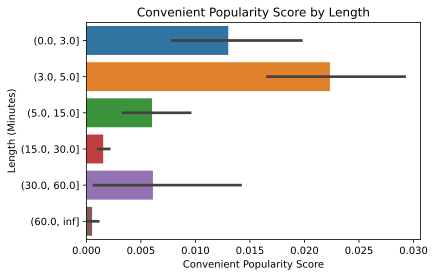

In [24]:
# Graph of duration and convenient popularity 
_ = plt.figure()
plot_duration_views = sns.barplot(
    y = pd.cut(
        x = df_search_details_da['length'].apply(lambda x: x.seconds / 60),
        bins = [np.PZERO, 3, 5, 15, 30, 60, np.PINF]
    ), 
    x = df_search_details_da['da.score.views'], 
    orient = 'h'
)
_ = plot_duration_views.set(
    title = 'Convenient Popularity Score by Length',
    xlabel = 'Convenient Popularity Score',
    ylabel = 'Length (Minutes)'
)

### Overall Popularity
- With overall popularity, we see an exact opposite of the graph above. Videos with five minutes and below length are scoring lower compared to its longer counterparts. This suggests that shorter duration videos receive more views, but not as many comments and likes. 
- Users are watching the video, but not much interaction is happening. The distribution is still unimodal, but with a lot less skew. 
- The favored video length in this meteric is between 5 minutes and 30 minutes. 

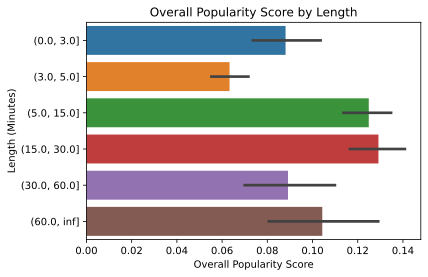

In [25]:
# Graph of length and overall popularity 
_ = plt.figure()
plot_duration_popularity = sns.barplot(
    y = pd.cut(
        x = df_search_details_da['length'].apply(lambda x: x.seconds / 60),
        bins = [np.PZERO, 3, 5, 15, 30, 60, np.PINF]
    ), 
    x = df_search_details_da['da.score.popularity'], 
    orient = 'h'
)
_ = plot_duration_popularity.set(
    title = 'Overall Popularity Score by Length',
    xlabel = 'Overall Popularity Score',
    ylabel = 'Length (Minutes)'
)

## Data Analysis and Results 

 To start the analysis of our data, we decided to first explore the relationship between each video attribute and the average number of views (our "convenient popularity" parameter). This gave us an intial insight as to what kinds of specific attributes garner a lot of views, and highlighted certain data points could be interesting and worth look into further. Because we know that video popularity is not only based on views, we then followed up by analyzing the relationship between the video attributes with our "overall popularity" parameter, to see which attributes on average have the most video interaction, and thus popularity.     

We began by comparing the 2 convenience popularity parameters with the presence of ads, plotting four separate bar plots. We found that videos with ads at the beginning usually had higher likes, comments, and videos overall, meaning that **videos with ads played at the beginning tended to be more popular than videos without.** We again performed similar procedures for video quality on one bar plot, where we can see that **videos in HD were more popular than videos in SD (standard definition).**

When we started comparing average popularity across categories in a barplot we found that the videos categories overall across the convenient popularity parameter had similar distributions, with interesting data points at “Music” and “Movies”. Although Music seems like an extreme outlier value, we believe that this could possibly be due to the nature of music videos (YouTube seems to be one of the only reliable, standardized platform to watch music videos on [thanks to merge with Vevo]( https://techcrunch.com/2013/07/02/youtube-renewed-vevo-deal)). To investigate the "Movies" category we looked up full-length movies on YouTube and discovered that YouTube does not have a view count for movies, only likes and comments. Without the like/dislike information, the "Movies" category cannot be compared with the other categories on the same scale. 
 

Taking note of the "Music" datapoint and disregarding "Movies", we then found the overall population distribution plotted on a barplot. We found that when we factor in likes/dislikes and comments the "Music" category is no longer an outlier. We also found that videos categorized as "Gaming" or "Travel and Events" tended to be the most popular types of videos.

Next, when we graphed barplots showing the number of tags compared to overall popularity, we found that the overall popuarity was similar across all of the range of tags. Therefore, we found that it is likely the number of tags does not significantly impact video popularity.

Finally, from our initial data analysis on video duration we determined that the most common length of videos were between 3-15 min.. Therefore, we decided to further segment the video lengths into smaller increments within the 3-15 min. range and compare them to our popularity parameters. Our first barplot (Duration and Convenience Popularity) suggests that shorter videos (less than 5 min. videos) tend to be more popular. However, just like video categories when we consider overall popularity (our second barplot), we found that videos between 5-30 min. tended to be slightly more popular. This reminded us of the "Music" category, because they both seem to have high average amounts of views, but significantly decrease in popularity when the likes/dislikes/comment ratio is added.

# Ethics & Privacy

This research conforms to the privacy policies of data providing social media platforms. Because our research question is about social media platforms like YouTube, it encompasses many different people; while we can estimate a common age range for social media users even those without a social media account can still view these videos and still contribute to the stats behind those videos (no matter the media platform). These stats are also used to make algorithmic recommendations to everyone who accesses the platform (YouTube), therefore we believe our project scope would include some general internet users in addition to those who actually have accounts and are active on YouTube. 

Our data comes from the YouTube API, which includes the account username for the content creator, but does not include any other personal identifying information about those who had interactions with a given video. Therefore, we believe that privacy concerns would be minimal with this dataset.

# Conclusion & Discussion

**Based on our analysis, our hypothesis was mostly correct in that some attributes that affect the popularity of a YouTube video in the United States include the presence of ads, video quality, video category, and duration, while tags may not be as relevant to the overall popularity. More popular videos tend to contain ads in the beginning, be in HD, are categorized as either “Gaming” or "Travel and Events", and are between 5-30 min.** 

In addition, we believe that our use of two different popularity parameters supports the idea that YouTube does not only consider views, but considers other user inputs as well. One interesting thing to note, however, is that YouTube's "most popular" ranking is not in direct correlation with view counts. As a matter of fact, none of the "viral" videos (e.g. [dQw4w9WgXcQ](https://youtu.be/dQw4w9WgXcQ), ["yee"](https://youtu.be/q6EoRBvdVPQ), [Despacito](https://www.youtu.be/kJQP7kiw5Fk)) that we know of are in the dataset provided by YouTube. We believe that our 'overall popularity" parameter is more reflective of the general opinion of YouTube users as it takes into account user interactions with videos that are meant to express opinions/thoughts about the video (likes/dislikes/comments).       


Our findings about these specific video attributes are not exclusive to other video attributes, as our analysis was limited to video attributes that we had access to through the YouTube API. Another limitiation to our analysis is due to the lack of transparency in YouTube's algorithm for its charts and recommendations. We do not have access to the criterion YouTube uses, which limited our analysis to our own definitions of "popularity". Overall, we cannot say that these attributes are actually reflective of YouTube's method of determining popular videos. These results are also limited in that we cannot say how much these attributes affect popularity, we can only conclude the common attributes of what makes videos popular (again, based on our own definition of video popularity). To further exapnd the scope of our study we would want to expand the parameters of popularity (possibly through linear regression on a larger dataset), and investigate more attributes (like ads in the middle of videos) with a more accurate popularity paramter. We would also likely include more correlatative study in order to draw more concrete conclusions, and are interested in building a popularity predictive model with data like this.

We believe that these results are telling in that it gave us slight insight as to what conditions make a video widespread among people. This widespread/widereaching nature of the Internet makes the content of videos that meet these conditions more influential. It is important to know what kinds of content is popular and why, as well as who has control over this influential content to ensure that data is being used ethically.

# Team Contributions

- Jared contributed to the project by importing data for the youtube search dataset. He contributed in creating charts for the final comparison with all the video characteristics and popularity. He also contributed to the video script.
- Jimin contributed to the project creating charts and graphs for tags vs popularity. He also analyzed this comparision. He created the graph for the final comparison with all the video characteristics and popularity. He also contributed to the video script.
- Kane contributed to this project by writing the report after discussing the analysis and conclusion with the team. He also contributed to the video script. 
- Laurence contributed to this project by creating charts and graphs for length vs popularity and analyzed the comparison. He also contributed to the video script and recorded the video.
- Nisha contributed to this project by cleaning the data. She also created and analyzed graphs from category vs popularity. She contributed to the team contributions portion of the final report. She also contributed to the video script.